# Logistic Regresion for banking prediuctions

In these dataset we are going to predict if the bank client are going to subscribe to a term desposit (binary variable) depending on a set of features.

**Logisitc Regresion Features**

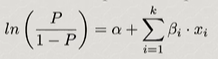

*   To estimate the coeficients we should use the **maxim authenticity technique** & the **Newton-Raphson algorithm**. 
*   A small **p-valor** more significant is the variable to the model. 
*   To validate the model we use the **k-fold CV technique**. 
*   The **decision threshold** of the model will affect the sensibility and efficiency. 
*   The efficiency of the model is measured with the **ROC curve**. 



## Import Libraries & Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving bank.csv to bank.csv
User uploaded file "bank.csv" with length 579778 bytes


In [3]:
data = pd.read_csv("bank.csv", sep=";")

In [4]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [5]:
data.shape

(4119, 21)

In [6]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

## Data Cleaning

In [7]:
data["y"] = (data["y"]=="yes").astype(int)

In [8]:
data["y"].dtypes

dtype('int64')

In [9]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0


In [10]:
data["education"].unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

In [11]:
data["education"] = np.where(data["education"]=="basic.4y", "Basic", data["education"])
data["education"] = np.where(data["education"]=="basic.6y", "Basic", data["education"])
data["education"] = np.where(data["education"]=="basic.9y", "Basic", data["education"])

data["education"] = np.where(data["education"]=="high.school", "High School", data["education"])
data["education"] = np.where(data["education"]=="professional.course", "Professional Course", data["education"])
data["education"] = np.where(data["education"]=="university.degree", "University Degree", data["education"])
data["education"] = np.where(data["education"]=="illiterate", "Illiterate", data["education"])
data["education"] = np.where(data["education"]=="UnKnown", "Unknown", data["education"])

In [12]:
data["education"].unique()

array(['Basic', 'High School', 'University Degree', 'Professional Course',
       'unknown', 'Illiterate'], dtype=object)

In [13]:
data["y"].value_counts()

0    3668
1     451
Name: y, dtype: int64

In [14]:
data.groupby("y").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
0,39.895311,219.40976,2.605780,982.763086,0.141767,0.240185,93.599677,-40.586723,3.802826,5175.502072
1,41.889135,560.78714,1.980044,778.722838,0.585366,-1.177384,93.417268,-39.786475,2.145448,5093.118625


In [15]:
data.groupby("education").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
education,,,,,,,,,,,
Basic,42.337124,253.898457,2.429732,978.815597,0.149472,0.237368,93.658600,-41.120552,3.775701,5174.133144,0.079610
High School,38.097720,258.534202,2.630836,958.022801,0.206298,-0.002497,93.564314,-40.995765,3.511732,5163.212595,0.105320
Illiterate,42.000000,146.000000,4.000000,999.000000,0.000000,-2.900000,92.201000,-31.400000,0.834000,5076.200000,0.000000
Professional Course,40.207477,278.816822,2.512150,958.211215,0.194393,0.163925,93.599630,-40.127664,3.701426,5167.595140,0.121495
University Degree,39.017405,247.707278,2.583070,947.900316,0.207278,-0.009731,93.499109,-39.830063,3.547132,5163.023180,0.130538
unknown,42.826347,267.281437,2.538922,939.700599,0.263473,-0.074251,93.637455,-39.487425,3.410174,5151.260479,0.155689


## Exploratory Data Analysis

Text(0, 0.5, 'Product purchase')

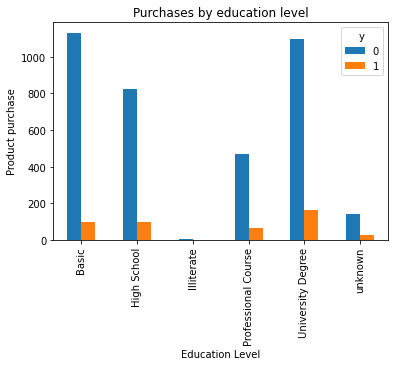

In [16]:
pd.crosstab(data.education, data.y).plot(kind="bar")
plt.title("Purchases by education level")
plt.xlabel("Education Level")
plt.ylabel("Product purchase")

y                0         1
marital                     
divorced  0.903587  0.096413
married   0.899562  0.100438
single    0.865568  0.134432
unknown   0.909091  0.090909


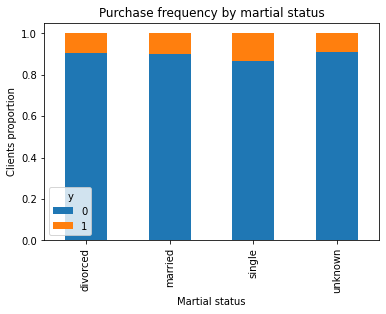

In [17]:
table = pd.crosstab(data.marital, data.y)
table_div = table.div(table.sum(1).astype(float), axis = 0)
table_div.plot(kind="bar", stacked=True)
plt.title("Purchase frequency by martial status")
plt.xlabel("Martial status")
plt.ylabel("Clients proportion")
print(table_div)

Text(0, 0.5, 'Product purchase frequency')

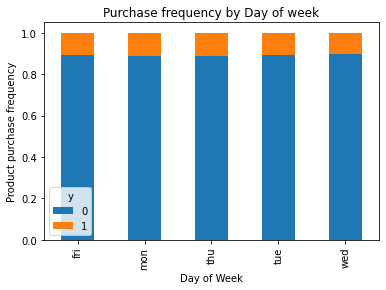

In [18]:
table = pd.crosstab(data.day_of_week, data.y)
table.div(table.sum(1).astype(float), axis = 0).plot(kind="bar", stacked = True)
plt.title("Purchase frequency by Day of week")
plt.xlabel("Day of Week")
plt.ylabel("Product purchase frequency")

Text(0, 0.5, 'Product purchase frequency')

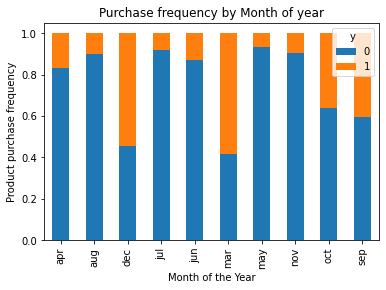

In [19]:
table = pd.crosstab(data.month, data.y)
table.div(table.sum(1).astype(float), axis = 0).plot(kind="bar", stacked = True)
plt.title("Purchase frequency by Month of year")
plt.xlabel("Month of the Year")
plt.ylabel("Product purchase frequency")

Text(0, 0.5, 'Product purchase')

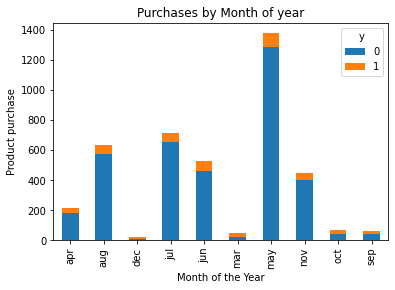

In [20]:
table = pd.crosstab(data.month, data.y).plot(kind="bar", stacked = True)
plt.title("Purchases by Month of year")
plt.xlabel("Month of the Year")
plt.ylabel("Product purchase")

Text(0, 0.5, 'Number of Clients')

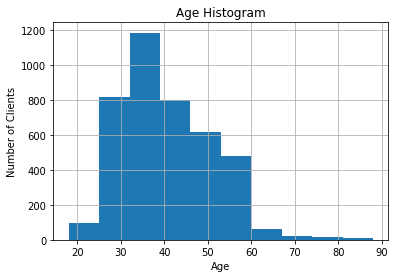

In [21]:
data.age.hist()
plt.title("Age Histogram")
plt.xlabel("Age")
plt.ylabel("Number of Clients")

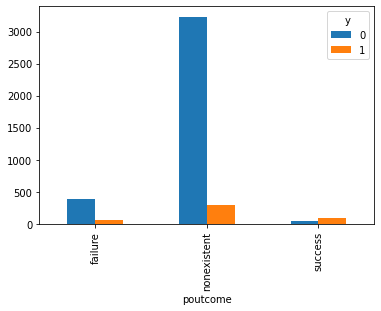

In [22]:
pd.crosstab(data.poutcome, data.y).plot(kind="bar")

## Convert categorical variables to dummies categories.

In [23]:
categories = ["job", "marital","education", "housing", "loan", "contact", 
              "month", "day_of_week", "poutcome"]
for category in categories:
    cat_list = "cat"+ "_"+category
    cat_dummies = pd.get_dummies(data[category], prefix=category)
    data_new = data.join(cat_dummies)
    data = data_new

In [24]:
data_vars = data.columns.values.tolist()
data_vars

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'marital_unknown',
 'education_Basic',
 'education_High School',
 'education_Illiterate',
 'education_Professional Course',
 'education_University Degree',
 'education_unknown',
 'housing_no',
 'housing_unknown',
 'housing_yes',
 'loan_no',
 'loan_unknown',
 'loan_yes',
 'contact_cellular',
 'contact_telephone',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 '

In [25]:
to_keep = [v for v in data_vars if v not in categories]
to_keep = [v for v in to_keep if v not in ["default"]]

In [26]:
bank_data = data[to_keep]
bank_data.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_High School',
       'education_Illiterate', 'education_Professional Course',
       'education_University Degree', 'education_unknown', 'housing_no',
       'housing_unknown', 'housing_yes', 'loan_no', 'loan_unknown',
       'loan_yes', 'contact_cellular', 'contact_telephone', 'month_apr',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'd

In [27]:
bank_data_vars = bank_data.columns.tolist()
Y = ['y']
X = [v for v in bank_data_vars if v not in Y]

# Model features selection

In [28]:
n = 12

In [29]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [30]:
lr = LogisticRegression()

In [31]:
rfe = RFE(lr, n)
rfe = rfe.fit(bank_data[X], bank_data[Y])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iteratio

In [32]:
print(rfe.support_)

[False False False False  True False False False  True False False False
 False False False  True False False False  True  True False False False
 False False False False False False False False False False False False
 False False False False False False  True  True  True  True  True False
 False False False False False False False  True False  True]


In [33]:
print(rfe.ranking_)

[41 39 18 45  1 17 26 22  1 35  2  8  5 38  7  1  6 24 43  1  1 40 15 28
 27 47 31 12 46 19 30  4  9 14 44 13 20 33 11  3 37 21  1  1  1  1  1 23
 32 42 34 25 29 36 10  1 16  1]


In [34]:
z=zip(bank_data_vars,rfe.support_, rfe.ranking_)

In [35]:
list(z)

[('age', False, 41),
 ('duration', False, 39),
 ('campaign', False, 18),
 ('pdays', False, 45),
 ('previous', True, 1),
 ('emp.var.rate', False, 17),
 ('cons.price.idx', False, 26),
 ('cons.conf.idx', False, 22),
 ('euribor3m', True, 1),
 ('nr.employed', False, 35),
 ('y', False, 2),
 ('job_admin.', False, 8),
 ('job_blue-collar', False, 5),
 ('job_entrepreneur', False, 38),
 ('job_housemaid', False, 7),
 ('job_management', True, 1),
 ('job_retired', False, 6),
 ('job_self-employed', False, 24),
 ('job_services', False, 43),
 ('job_student', True, 1),
 ('job_technician', True, 1),
 ('job_unemployed', False, 40),
 ('job_unknown', False, 15),
 ('marital_divorced', False, 28),
 ('marital_married', False, 27),
 ('marital_single', False, 47),
 ('marital_unknown', False, 31),
 ('education_Basic', False, 12),
 ('education_High School', False, 46),
 ('education_Illiterate', False, 19),
 ('education_Professional Course', False, 30),
 ('education_University Degree', False, 4),
 ('education_unkno

In [36]:
cols = ["previous","euribor3m","job_retired","job_blue-collar","month_dec","month_jul","month_jun","month_mar","day_of_week_wed","poutcome_nonexistent"]

In [37]:
X = bank_data[cols]
Y = bank_data["y"]

# Model implementation with statsmodel.api

In [38]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [39]:
logit_model = sm.Logit(Y,X)

In [40]:
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.293332
         Iterations 7


In [41]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 4119
Model:                          Logit   Df Residuals:                     4109
Method:                           MLE   Df Model:                            9
Date:                Tue, 05 Oct 2021   Pseudo R-squ.:                  0.1509
Time:                        15:25:04   Log-Likelihood:                -1208.2
converged:                       True   LL-Null:                       -1422.9
Covariance Type:            nonrobust   LLR p-value:                 7.348e-87
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
previous                -0.0577      0.067     -0.864      0.388      -0.189       0.073
euribor3m               -0.5640      0.036    -15.541      0.000      -0.635      -0.493
job_retired              0.2753      0.217      1.269      0.204      -0.150       0.701
job_blue-collar         -0.5810      0.150     -3.877      0.000      -0.875      -0.287
month_dec                1.0249      0.448      2.289      0.022       0.147       1.903
month_jul                0.8041      0.177      4.546      0.000       0.457       1.151
month_jun                0.8873      0.164      5.398      0.000       0.565       1.210
month_mar                1.5153      0.311      4.865      0.000       0.905       2.126
day_of_week_wed         -0.0554      0.138     -0.401      0.689      -0.326       0.216
poutcome_nonexistent    -0.7089      0.120     -5.921      0.000      -0.944      -0.474
========================================================================================
"""

In [42]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
=====================================================================
Model:                Logit             Pseudo R-squared:  0.151     
Dependent Variable:   y                 AIC:               2436.4727 
Date:                 2021-10-05 15:25  BIC:               2499.7064 
No. Observations:     4119              Log-Likelihood:    -1208.2   
Df Model:             9                 LL-Null:           -1422.9   
Df Residuals:         4109              LLR p-value:       7.3477e-87
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       7.0000                                         
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
previous             -0.0577   0.0668  -0.8640 0.3876 -0.1886  0.0732
euribor3m            -0.5640   0.0363 -15.5411 0.0000 -0.6352 -0.4929
job_retired           0.2753   0.2170   1.2690 0.2044 -0.1499  0.7006
job_blue-collar      -0.5810   0.1499  -3.8770 0.0001 -0.8747 -0.2873
month_dec             1.0249   0.4478   2.2888 0.0221  0.1473  1.9026
month_jul             0.8041   0.1769   4.5459 0.0000  0.4574  1.1508
month_jun             0.8873   0.1644   5.3982 0.0000  0.5652  1.2095
month_mar             1.5153   0.3115   4.8648 0.0000  0.9048  2.1259
day_of_week_wed      -0.0554   0.1383  -0.4006 0.6887 -0.3265  0.2157
poutcome_nonexistent -0.7089   0.1197  -5.9205 0.0000 -0.9436 -0.4742
=====================================================================

"""

# Model implementation with sckit-learn

In [43]:
from sklearn import linear_model

In [44]:
logit_model = linear_model.LogisticRegression()

In [45]:
logit_model.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
logit_model.score(X,Y)

0.8956057295460063

In [47]:
Y.mean()

0.10949259529011895

In [48]:
1-Y.mean()

0.8905074047098811

In [49]:
pd.DataFrame(list(zip(X.columns, np.transpose(logit_model.coef_))))

,0,1
0,previous,[0.5675338573184532]
1,euribor3m,[-0.5026256499540654]
2,job_retired,[0.40343351407790295]
3,job_blue-collar,[-0.44049727903490804]
4,month_dec,[1.0797242670015197]
5,month_jul,[0.7190848571955715]
6,month_jun,[0.8497236107593259]
7,month_mar,[1.5063506920043086]
8,day_of_week_wed,[0.050093234782969065]
9,poutcome_nonexistent,[0.3581608349477273]


# Logistic model implementation

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=0)

In [52]:
lm = linear_model.LogisticRegression()
lm.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
probs = lm.predict_proba(X_test)

In [54]:
probs

array([[0.95421427, 0.04578573],
       [0.81940191, 0.18059809],
       [0.92672675, 0.07327325],
       ...,
       [0.74948809, 0.25051191],
       [0.96547253, 0.03452747],
       [0.56325037, 0.43674963]])

In [55]:
prediction = lm.predict(X_test)

In [56]:
prediction

array([0, 0, 0, ..., 0, 0, 0])

## Treshold

In [57]:
prob = probs[:,1]
prob_df = pd.DataFrame(prob)
threshold = 0.1
prob_df["prediction"] = np.where(prob_df[0]>threshold, 1, 0)
prob_df.head()

,0,prediction
0,0.045786,0
1,0.180598,1
2,0.073273,0
3,0.065264,0
4,0.032591,0


In [58]:
pd.crosstab(prob_df.prediction, columns = "count")

col_0,count
prediction,
0,846
1,390


In [59]:
390/len(prob_df)*100

31.55339805825243

In [60]:
threshold = 0.15
prob_df["prediction"] = np.where(prob_df[0]>threshold, 1, 0)
pd.crosstab(prob_df.prediction, columns = "count")

col_0,count
prediction,
0,899
1,337


In [61]:
337/len(prob_df)*100

27.26537216828479

In [62]:
threshold = 0.05
prob_df["prediction"] = np.where(prob_df[0]>threshold, 1, 0)
pd.crosstab(prob_df.prediction, columns = "count")

col_0,count
prediction,
0,533
1,703


In [63]:
703/len(prob_df)*100

56.87702265372169

## Predictions

In [64]:
probs

array([[0.95421427, 0.04578573],
       [0.81940191, 0.18059809],
       [0.92672675, 0.07327325],
       ...,
       [0.74948809, 0.25051191],
       [0.96547253, 0.03452747],
       [0.56325037, 0.43674963]])

In [65]:
prob= probs[:,1]
prob_df= pd.DataFrame(prob)
threshold=0.1
prob_df["prediction"] = np.where(prob_df[0]>threshold,1,0)
prob_df["actual"] = list(y_test)
prob_df

,0,prediction,actual
0,0.045786,0,0
1,0.180598,1,0
2,0.073273,0,0
3,0.065264,0,0
4,0.032591,0,0
...,...,...,...
1231,0.065264,0,0
1232,0.065201,0,0
1233,0.250512,1,0
1234,0.034527,0,0


# Validation

## Accuracy

In [67]:
from sklearn.metrics import accuracy_score

In [93]:
acc = accuracy_score(y_test, prediction)
print ("Accuracy score: %.3f" %(acc*100))

Accuracy score: 90.049


## Precision 

In [69]:
from sklearn.metrics import precision_score

In [70]:
pcs = precision_score(y_test, prediction)
print ("Precision: %.3f" %(pcs*100))

Precision: 48.148


## Recall

In [71]:
from sklearn.metrics import recall_score

In [73]:
rcs = recall_score(y_test, prediction)
print ("Recall: %.3f" % (rcs*100))

Recall: 10.656


## Crossways Validation

In [74]:
from sklearn.model_selection import cross_val_score

In [75]:
scores = cross_val_score(linear_model.LogisticRegression(), X, Y, scoring="accuracy", cv=10)

In [76]:
scores

array([0.90776699, 0.88834951, 0.90048544, 0.8907767 , 0.89805825,
       0.8907767 , 0.88592233, 0.89320388, 0.88592233, 0.88564477])

In [77]:
scores.mean()

0.8926906904778779

## Confusion Matrix

In [78]:
confusion_matrix = pd.crosstab(prob_df.prediction, prob_df.actual)

In [79]:
confusion_matrix

actual,0,1
prediction,,
0,806,40
1,308,82


## TP, FP, TN, FN from the confusion matrix

In [82]:
TN=confusion_matrix[0][0]
TP=confusion_matrix[1][1]
FP=confusion_matrix[0][1]
FN=confusion_matrix[1][0]

In [89]:
sens = TP/(TP+FN)
sens

0.38524590163934425

In [90]:
espc_1 = 1-TN/(TN+FP)
espc_1

0.06463195691202872

## Classification Report

In [80]:
from sklearn.metrics import classification_report

In [81]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1114
           1       0.48      0.11      0.17       122

    accuracy                           0.90      1236
   macro avg       0.70      0.55      0.56      1236
weighted avg       0.87      0.90      0.87      1236



The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F1 score is the harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0.

## ROC curve

Another important metric is ROC/AUC. This metric is very useful when classifying between classes where one has most of the examples and the other doesn't have many. For example on a cancer dataset, you would expect 1% of the data to be positive for cancer and the other 99% to be negative. In this case, a model that simply says negative all the time would get a high accuracy of 99%, however with an ROC/AUC metric the result wouldn't be good.

More information here: https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5

In [100]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, lm.predict_proba(X_test)[:,1])
roc_auc

0.7530682520528593

Let's plot the ROC curve, our objective is for it to be as close as 1 as possible, the curve should be as close to the top and left axis of the chart as possible.

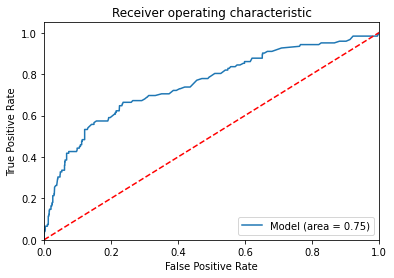

In [101]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, lm.predict_proba(X_test)[:,1])
#roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='Model (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(loc="lower right")
plt.show()

### ROC curve Manually

In [83]:
TN=confusion_matrix[0][0]
TP=confusion_matrix[1][1]
FP=confusion_matrix[0][1]
FN=confusion_matrix[1][0]

In [84]:
sens = TP/(TP+FN)
sens

0.6721311475409836

In [85]:
espc_1 = 1-TN/(TN+FP)
espc_1

0.2764811490125674

In [86]:
threshold= [0.04, 0.05, 0.07, 0.1, 0.12, 0.15, 0.18, 0.2, 0.25]
sensitivities = [1]
especifities_1 = [1]

for t in threshold:
  prob_df["prediction"] = np.where(prob_df[0]>t,1,0)
  prob_df["actual"] = list(y_test)

  confusion_matrix = pd.crosstab(prob_df.prediction, prob_df.actual)

  TN=confusion_matrix[0][0]
  TP=confusion_matrix[1][1]
  FP=confusion_matrix[0][1]
  FN=confusion_matrix[1][0]

  sens = TP/(TP+FN)
  sensitivities.append(sens)
  espc_1 = 1-TN/(TN+FP)
  especifities_1.append(espc_1)
sensitivities.append(0)
especifities_1.append(0)

In [87]:
sensitivities

[1,
 0.8770491803278688,
 0.819672131147541,
 0.6967213114754098,
 0.6721311475409836,
 0.6721311475409836,
 0.6475409836065574,
 0.5737704918032787,
 0.5327868852459017,
 0.38524590163934425,
 0]

In [88]:
especifities_1

[1,
 0.6508078994614004,
 0.5412926391382405,
 0.33213644524236985,
 0.2764811490125674,
 0.2710951526032316,
 0.23159784560143626,
 0.1840215439856373,
 0.12118491921005381,
 0.06463195691202872,
 0]

Text(0.5, 1.0, 'Curva ROC')

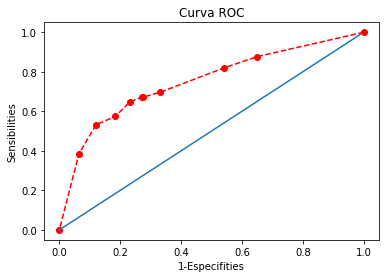

In [91]:
plt.plot(especifities_1, sensitivities, marker="o", linestyle="--", color="r")
x=[i*0.01 for i in range(100)]
y=[i*0.01 for i in range(100)]
plt.plot(x,y)
plt.xlabel("1-Especifities")
plt.ylabel("Sensibilities")
plt.title("Curva ROC")